In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'    
import seaborn as sns

root_dir = "../"
sweep_dir = os.path.join(root_dir, "sweeps")
results_dir = os.path.join(root_dir, "results")

df = pd.read_csv(os.path.join(sweep_dir, "sweep_chexpert.csv"))
df["speaker"] = df["alpha"].apply(
    lambda x: r"Pragmatic ($\alpha=0.20$)" if x == 0.20 else r"Literal ($\alpha=0.00$)"
)

# vip_max_queries = 30
# vip_df = pd.read_pickle(
#     os.path.join(results_dir, f"cub_vip_query{vip_max_queries}_sbiased.pkl")
# )
# prediction = np.array(vip_df["prediction"].values.tolist())
# vip_logits = np.array(vip_df["logits"].values.tolist())

# lengths = np.unique(df["explanation_length"].values)
# vip_prediction = np.argmax(vip_logits, axis=-1)
# vip_prediction = vip_prediction[:, lengths - 1]
# vip_accuracy = np.mean(vip_prediction == prediction[:, None], axis=0)

sns.set_theme()
sns.set_context("paper")

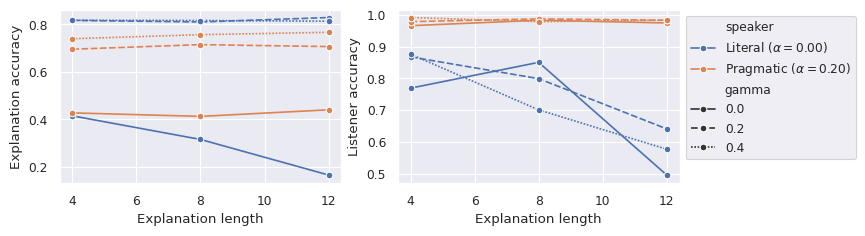

In [2]:
figure_dir = os.path.join(root_dir, "figures", "sweeps")
os.makedirs(figure_dir, exist_ok=True)

_, axes = plt.subplots(1, 2, figsize=(16 / 2, 9 / 4))
ax = axes[0]
sns.lineplot(
    data=df,
    x="explanation_length",
    y="val/explanation accuracy",
    hue="speaker",
    style="gamma",
    marker="o",
    ax=ax,
)
ax.set_xlabel("Explanation length")
ax.set_ylabel("Explanation accuracy")
ax.get_legend().remove()

ax = axes[1]
sns.lineplot(
    data=df,
    x="explanation_length",
    y="val/listener accuracy",
    hue="speaker",
    style="gamma",
    marker="o",
    errorbar=None,
    ax=ax,
)
# ax.plot(lengths, vip_accuracy, linestyle="--", label=f"VIP ({vip_max_queries} queries)")
ax.set_xlabel("Explanation length")
ax.set_ylabel("Listener accuracy")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig(os.path.join(figure_dir, "sweep_chexpert.svg"), bbox_inches="tight")
# plt.savefig(os.path.join(figure_dir, "sweep_chexpert.png"), bbox_inches="tight")
plt.show()